In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import pandas as pd
from astropy.io import fits
from astropy.stats import LombScargle
from gatspy import datasets, periodic

In [2]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
target = fits.open('kplr010536761-2009166043257_llc.fits')

In [4]:
target.info()

Filename: kplr010536761-2009166043257_llc.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      58   ()      
  1  LIGHTCURVE  BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE    ImageHDU        48   (5, 4)   int32   


In [5]:
target[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-01'         / file creation date.                            
CREATOR = '796031 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [6]:
data = target[1].data

In [7]:
time = data['TIME'] 
flux = data['PDCSAP_FLUX'] 
rel_flux = (flux-np.nanmedian(flux))/np.nanmedian(flux)
err = data['PDCSAP_FLUX_ERR']
rel_err = (err-np.nanmedian(err))/np.nanmedian(err)

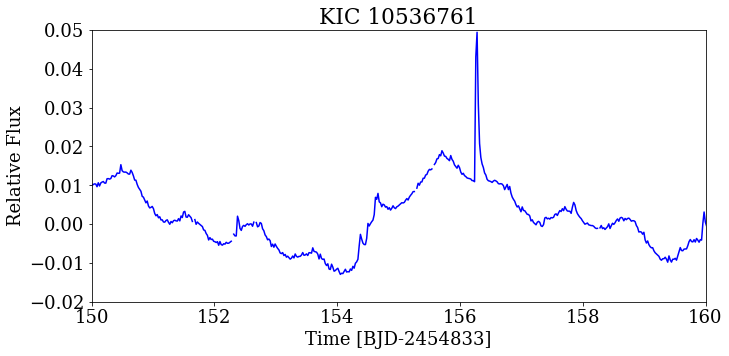

In [8]:
fig = plt.figure(figsize = (11,5))

plt.plot(time,rel_flux,color='b')

plt.xlim(150,160)
plt.ylim(-0.02,0.05)
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Relative Flux')
plt.title('KIC 10536761')

In [9]:
cut = np.where(np.isnan(flux) == False)

In [10]:
np.size(time[cut])

1624

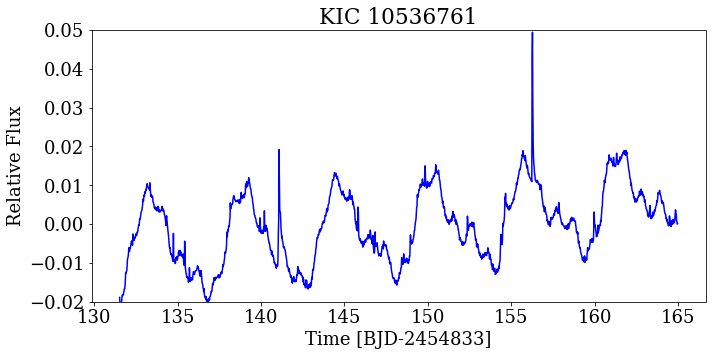

In [11]:
fig = plt.figure(figsize = (11,5))

plt.plot(time[cut],rel_flux[cut],color='b')

#plt.xlim(150,156)
plt.ylim(-0.02,0.05)
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Relative Flux')
plt.title('KIC 10536761')

In [18]:
model = periodic.LombScargleFast(fit_period = True)

model.optimizer.period_range = (0.2, 6.0)

model.fit(time[cut], rel_flux[cut], err[cut])

Finding optimal frequency:
 - Estimated peak width = 0.188
 - Using 5 steps per peak; omega_step = 0.0375
 - User-specified period range:  0.2 to 6
 - Computing periods at 810 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


In [19]:
model.best_period

5.6495940473148138

[(0, 1),
 (1.0, 10.0),

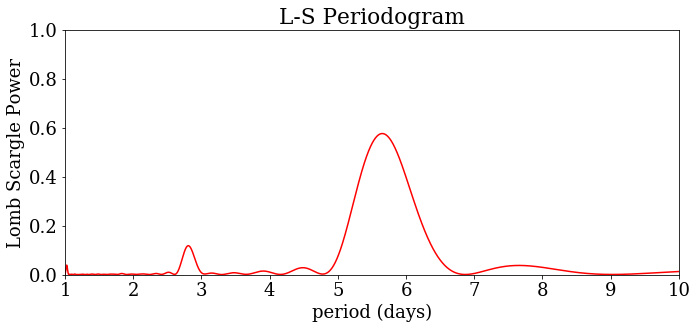

In [28]:
# Compute the scores on a grid of periods
periods = np.linspace(0.2, 10.0, 10000)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scores = model.score(periods)

# Plot the results
fig, ax = plt.subplots(figsize=(11, 5))
fig.subplots_adjust(bottom=0.2)
ax.plot(periods, scores, 'red')
ax.set(xlabel='period (days)', ylabel='Lomb Scargle Power', title='L-S Periodogram',
       xlim=(1.0, 10.0), ylim=(0, 1))